In [1]:
import yfinance as yf
import numpy as np
from data_config import *

In [5]:
def calculate_realized_volatility(data, vol_window_days, annualization_factor=None):
    log_returns = np.log(data / data.shift(1))
    sqr_log_returns = log_returns ** 2
    data['Realized_Vol'] = sqr_log_returns.rolling(window=vol_window_days).mean() ** 0.5 * np.sqrt(252)
    
    return data


In [11]:
def get_data(ticker, start_date, end_date, vol_window_days=5, save_csv=False, plot_data=False):
    """
    Function to get daily data with additional features
    """
        
    try:
        # Download data
        data = yf.download(ticker, start=start_date, end=end_date)['Close']
        
        if data.empty:
            print("No data available for the specified period")
            return None
        
        # Clean the data (remove any rows with NaN values)
        data_clean = data.dropna()
        
        print(f"Downloaded {len(data_clean)} intra-day intervals")
        print(f"Period: {data_clean.index.min()} to {data_clean.index.max()}")
        print(f"Trading days: {data_clean.index.normalize().nunique()}")

         # Calculate realized volatility
        data_clean = calculate_realized_volatility(data_clean.copy(), vol_window_days)
        data_clean.columns = ['Price', "Realized_Vol"]

        # Save to CSV if requested
        if save_csv:
            filename = f"{ticker}_{start_date}_to_{end_date}.csv"
            data_clean.to_csv(filename)
            print(f"\nData saved to {filename}")
        
        # Plot if requested
        if plot_data:
            ax = (
                data_clean.plot(figsize=[12,6],
                color = ['blue', 'grey'],
                style = ['-', '--'],
                lw = 1,
                secondary_y = "Realized_Vol")
            )

            ax.legend()
        
        return data_clean
    
    except Exception as e:
        print(f"Error: {e}")
        return None

[*********************100%***********************]  1 of 1 completed

Downloaded 4695 intra-day intervals
Period: 2007-01-03 00:00:00 to 2025-08-29 00:00:00
Trading days: 4695

Data saved to TLT_2007-01-01_to_2025-08-30.csv


,Price,Realized_Vol
Date,,
2007-01-03,50.249786,NaN
2007-01-04,50.554432,NaN
2007-01-05,50.334412,NaN
2007-01-08,50.424694,NaN
2007-01-09,50.424694,NaN
...,...,...
2025-08-25,86.471245,0.079579
2025-08-26,86.421432,0.068276
2025-08-27,86.321815,0.066984


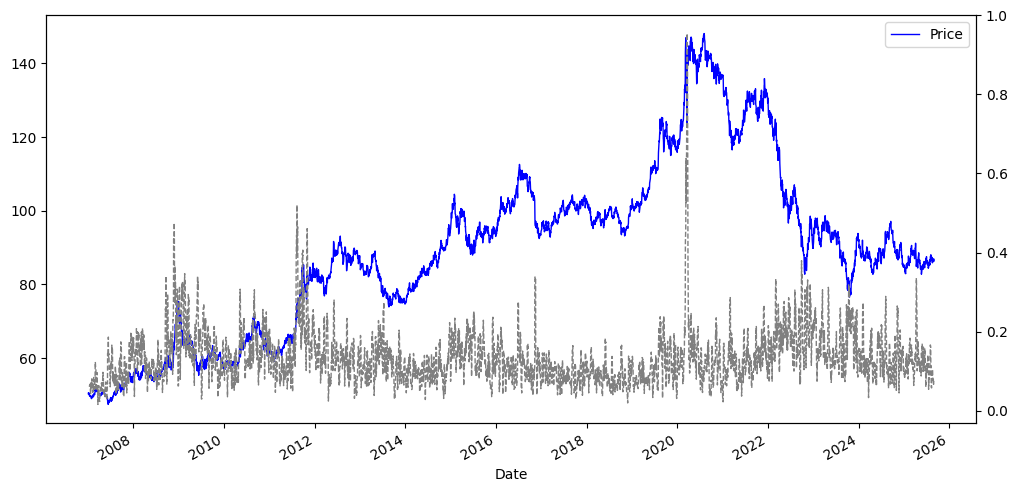

In [12]:
data = get_data(
    ticker = 'TLT',
    start_date=DATA_START_DATE, 
    end_date=DATA_END_DATE, 
    vol_window_days=VOL_WINDOW_DAYS,
    save_csv=SAVE_CSV, 
    plot_data=PLOT_DATA
    )
data